## Importing the necessary libraries

In [1]:
!apt-get install poppler-utils tesseract-ocr libmagic-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
The following NEW packages will be installed:
  libmagic-dev poppler-utils
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 291 kB of archives.
After this operation, 1,086 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.10 [186 kB]
Fetched 291 kB in 1s (350 kB/s)
Selecting previously unselected package libmagic-dev:amd64.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../libmagic-dev_1%3a5.41-3ubuntu0.1_amd64.deb ...
Unpacking libmagic-dev:amd64 (1:5.41-3ubuntu0.1) ...
Selecting previously unselected package poppler-utils.
Preparing to unpack .../poppler-

In [2]:
!pip install -Uq "unstructured[all-docs]" pillow lxml
!pip install -Uq chromadb tiktoken
!pip install -Uq langchain langchain-community langchain-openai langchain-groq
!pip install -Uq python_dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 78.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.9/527.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 1.6 MB/s eta 0:00:00
   

In [3]:
import os
from google.colab import userdata

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY") or userdata.get("OPENAI_API_KEY")
LANGCHAIN_API_KEY = os.environ.get("LANGCHAIN_API_KEY") or userdata.get("LANGCHAIN_API_KEY")
GROQ_API_KEY = os.environ.get("GROQ_API_KEY") or userdata.get("GROQ_API_KEY")
HF_TOKEN = userdata.get("HF_TOKEN")
os.environ['LANGCHAIN_TRACING_V2'] = "true"

## Partitioning the Document (PDF) for extracting text, image and tables.

In [4]:
from unstructured.partition.pdf import partition_pdf

output_path = "/content/"
file_path = output_path + "paper.pdf"

chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,
    strategy="hi_res",

    extract_image_block_types = ['Image','Table'],

    extract_image_block_to_payload = True,

    chunking_strategy = 'by_title',
    max_characters = 10000,
    combine_text_under_n_chars = 2000,
    new_after_n_chars = 6000,
)

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [5]:
set(str(type(el)) for el in chunks)
print(len(chunks))

2


In [6]:
chunks[1].to_dict()

{'type': 'CompositeElement',
 'element_id': 'cf698e947322b3dd2913b92201f593fc',
 'text': 'CamScanner',
 'metadata': {'filetype': 'application/pdf',
  'languages': ['eng'],
  'last_modified': '2025-09-16T18:58:11',
  'page_number': 3,
  'orig_elements': 'eJy1Vtmuo8YW/ZXWeSWnmadIeQCDmcwMBjuKWgxl5sGAARPl3y8+J62+ucPD1VWQSqjW3msXe1FQ69ff30ANGtBO34r07ecvb3SEEklKE+9xTKPvBAD0O8swt3eA4wRLEDfAsuzbT1/eGjBFaTRFO+f3t6TrhrRoowmMH/M6enaP6VsOiiyfdgTDcXbn/AkvRTrlO4pSJL6jfVe004v3668oTtBfsZ++YBiJfWV+++nLDwRH8a/sB0IgzFf8PyKfrB16G5/jBJpXP1axgtrtowS8/bEHbkUNpmcPPkKW/uqkaKIMfIujEVDEC4bZEiY4znarq+pkHM/Z3D7b75wAYwsvcFwm8Vki8XYm80uiHuxME3jbELjxJPCVKy6MLzvdTc6RaE/I1APRKgdlVNYl0YSkPwncagg2Ij8T0vKyp3UgNkM4fda2q73estfJDMHJnoqz5HqpPP+/cYIXjnMOHMdyAiJwrsJxuchzq8jDjM3Jy6s/f+9TfA3uxyUeuMU+7r0qB7s7vXInZ4czUeAWReQW//gpzpHlbGXXxXZ4R8l1X5RE9JjzT3U9ChpfRaKiINq6OGcXuXGVjqnPLKu0Y55cJKer1SLpNLdDDO+Cm0JF2YhzdKpUcf3eOx/PwRnNr0FjVNfg2kZSfU9wB03blADhXciVQMqJQi16zavVIKjJ4trctbLXgqaniv4+aNt0CrCJLsjH/npWPZRWplSf08lDjTBA2fKKPeSCgLyafN

In [7]:
elements = chunks[1].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
print(chunk_images)
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': 'c88bc444-2f94-4435-a05e-113bad855ec4',
 'text': '',
 'metadata': {'coordinates': {'points': ((np.float64(1347.2222222222222),
     np.float64(2252.777777777778)),
    (np.float64(1347.2222222222222), np.float64(2313.8888888888887)),
    (np.float64(1408.3333333333333), np.float64(2313.8888888888887)),
    (np.float64(1408.3333333333333), np.float64(2252.777777777778))),
   'system': 'PixelSpace',
   'layout_width': 1653,
   'layout_height': 2339},
  'last_modified': '2025-09-16T18:58:11',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 3,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAA9AD0DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RF

## Seperate element list for text, table and images

In [9]:
str(type(chunks[1]))

"<class 'unstructured.documents.elements.CompositeElement'>"

In [10]:
texts = []
tables = []

for chunk in chunks:
  if "Table" in str(type(chunk)):
    tables.append(chunk)

  if "CompositeElement" in str(type(chunk)):
    texts.append(chunk)

In [11]:
#Get Images from composite element
def get_images_base64(chunks):
  images_b64 = []
  for chunk in chunks:
    if "CompositeElement" in str(type(chunk)):
      chunk_els = chunk.metadata.orig_elements
      for el in chunk_els:
        if 'Image' in str(type(el)):
          images_b64.append(el.metadata.image_base64)
  return images_b64

images = get_images_base64(chunks)

In [12]:
tables

[]

### Checking what the images look like

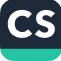

In [13]:
import base64
from IPython.display import Image, display

def display_base64_images(b64_code):
  # Decode the base64
  image_data = base64.b64decode(b64_code)
  # Display the code
  display(Image(data=image_data))

display_base64_images(images[1])

## Summarize the extracted data

### Text and Table summaries using open source models available on groq

In [14]:
!pip install -Uq langchain-groq

In [15]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

## Prompting

In [16]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary Chain
model = ChatGroq(api_key= GROQ_API_KEY, temperature=0.5, model="llama-3.1-8b-instant")
summarize_chain = prompt | model | StrOutputParser()

In [17]:
# Summarize text
text_summaries = summarize_chain.batch(texts,{'max_concurrency':3})
# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html,{'max_concurrency':3})

/usr/local/lib/python3.12/dist-packages/langsmith/client.py:290: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [18]:
text_summaries

["The passage discusses descriptive writing, specifically how to create vivid descriptions using sensory details such as sight, hearing, touch, smell, and taste. It provides examples of descriptive paragraphs about a rug, a teenage boy's room, a pet shop, and a person, and asks the reader to analyze the paragraphs for unity and sensory details.",
 'CamScanner is a mobile app that digitizes paper documents by taking photos of them, allowing users to edit, annotate, and share the scanned documents. It also includes features such as OCR (Optical Character Recognition), document organization, and cloud storage integration.']

### Image Summaries

gpt-4o-mini is paid to produce the image summaries. So I will be using free model from hugging face.

In [19]:
!pip install -Uq langchain_openai

In [ ]:
# from langchain_openai import ChatOpenAI

# prompt_template = """Describe the image in detail. For context,
#                   the image is part of a research paper explaining the system
#                   architecture. Be specific about graphs, such as bar plots."""
# messages = [
#     (
#         "user",
#         [
#             {"type": "text", "text": prompt_template},
#             {
#                 "type": "image_url",
#                 "image_url": {"url": "data:image/jpeg;base64,{image}"},
#             },
#         ],
#     )
# ]

# prompt = ChatPromptTemplate.from_messages(messages)

# chain = prompt | ChatOpenAI(api_key=OPENAI_API_KEY,model="gpt-4o-mini") | StrOutputParser()

# image_summaries = chain.batch(images)

### FREE MODEL

In [20]:
from openai import OpenAI

client = OpenAI(
    base_url="https://router.huggingface.co/v1",
    api_key=HF_TOKEN,
)

prompt_template = """Describe the image in detail. For context,
                  the image is part of a research paper explaining the system
                  architecture. Be specific about graphs, such as bar plots."""

image_summaries = []
for i, image_data in enumerate(images):
    if image_data: # Check if image_data is not empty
        try:
            completion = client.chat.completions.create(
                model="Qwen/Qwen2.5-VL-7B-Instruct:hyperbolic",
                messages=[
                    {
                        "role": "user",
                        "content": [
                            {
                                "type": "text",
                                "text": prompt_template,
                            },
                            {
                                "type": "image_url",
                                "image_url": {"url": f"data:image/jpeg;base64,{image_data}"}
                            }
                        ]
                    }
                ],
            )
            image_summaries.append(completion.choices[0].message.content)
        except Exception as e:
            print(f"Error processing image {i}: {e}")
            image_summaries.append(f"Error summarizing image {i}")
    else:
        print(f"Skipping empty image data for image {i}")
        image_summaries.append(f"Empty image data for image {i}")

Error processing image 0: Error code: 413 - {'error': 'request entity too large'}
Error processing image 2: Error code: 413 - {'error': 'request entity too large'}
Error processing image 4: Error code: 413 - {'error': 'request entity too large'}


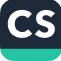

The image you've provided is a simple logo or icon. It features a white "CS" lettering on a dark blue background. The "CS" is stylized, with the "C" and "S" connected, forming a single unit. The design is clean and minimalistic, lacking any additional symbols, text, or graphical elements that might suggest a more complex system architecture or a research paper context. If you have a different image in mind that is part of a research paper explaining a system architecture, please provide that image, and I can give a more detailed description and analysis.


In [21]:
display_base64_images(images[5])
print(image_summaries[5])

## Load the data and summaries into the vectorstore

### create the vectorstore

In [22]:
# import huggingface embeddings
!pip install -Uq langchain-huggingface

In [23]:
# !pip install langchain-chroma
import uuid
from langchain.vectorstores import Chroma
# from langchain-chroma import Chroma
from langchain.storage import InMemoryStore
from langchain_core.documents import Document
# from langchain_openai import OpenAIEmbeddings
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

# child chunks
vectorstore = Chroma(collection_name='multi_modal_rag',embedding_function=HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))

# parent document
store = InMemoryStore()
id_key = "doc_id"

# The retriever
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/tmp/ipython-input-1413007937.py:12: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name='multi_modal_rag',embedding_function=HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2"))


### load the summaries and link to the original data

In [24]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key:doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))


# Add Tables
if tables: # Check if tables list is not empty
    table_ids = [str(uuid.uuid4()) for _ in tables]
    summary_tables = [
        Document(page_content=summary, metadata={id_key:table_ids[i]}) for i, summary in enumerate(table_summaries)
    ]
    retriever.vectorstore.add_documents(summary_tables)
    retriever.docstore.mset(list(zip(table_ids, tables)))
else:
    print("No tables found to add to vectorstore.")

# Add Image summaries
if images: # Check if images list is not empty
    img_ids = [str(uuid.uuid4()) for _ in images]
    summary_imgs = [
        Document(page_content=summary, metadata={id_key:img_ids[i]}) for i, summary in enumerate(image_summaries)
    ]
    retriever.vectorstore.add_documents(summary_imgs)
    retriever.docstore.mset(list(zip(img_ids, images)))
else:
    print("No images found to add to vectorstore.")

No tables found to add to vectorstore.


In [37]:
docs = retriever.invoke(
    "What is the context of this document?"
)

In [38]:
docs

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAA9AD0DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwC/8V/iXdJfT+HNEneBYTtu7mNsMzd0UjoB3PXPH18YJLEknJPJJqxf3LXmo3N1ISXmleRie5JJ/rXZeAvhnf8AjIm8mkNnpSNtM+MtIR1CD+p4HvW6tFGWrZwtFfTMHwi8D2UCpcWLzHp5lxdOCf8AvkgfpXNeM/g5oNro91

In [ ]:
for doc in docs:
  print(str(doc) + "\n\n" + "-" * 80)

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAimBmUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKRs7TjrQAtFR5bzhz8m3n60MHCn

## RAG Pipeline

In [39]:
# New, corrected code:
from langchain_huggingface import HuggingFaceEndpoint

# Define your LLM using the new class
llm = HuggingFaceEndpoint(
    repo_id='llava-hf/llava-1.5-7b-hf',
    huggingfacehub_api_token=HF_TOKEN,
    task="text-generation",
    max_new_tokens=500
)

In [40]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
from langchain_core.messages import SystemMessage, HumanMessage
# from langchain_openai import ChatOpenAI
from base64 import b64decode
from openai import OpenAI

def parse_docs(docs):
  """split b64-encoded images and texts"""
  b64 = []
  text = []
  for doc in docs:
    try:
      # Simple check to see if it's base64 by attempting to decode
      b64decode(doc)
      b64.append(doc)
    except Exception as e:
      text.append(doc)
  return {"images": b64, "texts": text}

def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]


    context_text = ""
    if len(docs_by_type["texts"]) > 0:
      for text_element in docs_by_type["texts"]:
        # Assuming text_element is a Document object with a 'text' attribute
        if hasattr(text_element, 'text'):
            context_text += text_element.text + "\n\n"
        else:
            # Fallback if it's not a Document object as expected
            context_text += str(text_element) + "\n\n"


    # construct prompt content including images
    prompt_content = [{"type":"text","text":f"""Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """}]

    if len(docs_by_type["images"]) > 0:
      for image in docs_by_type["images"]:
        prompt_content.append(
            {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
        )

    return prompt_content


# Define your LLM using the OpenAI client with the Hugging Face router
client = OpenAI(
    base_url="https://router.huggingface.co/v1",
    api_key=HF_TOKEN,
)

def call_llm(prompt_content):
    """Helper function to call the LLM with the correct format"""
    completion = client.chat.completions.create(
        model="Qwen/Qwen2.5-VL-7B-Instruct:hyperbolic", # Or other suitable multimodal model
        messages=[
            {
                "role": "user",
                "content": prompt_content
            }
        ],
        # max_new_tokens=500 # Adjust as needed # Removed this line
    )
    return completion.choices[0].message.content

chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | RunnableLambda(call_llm) # Use the helper function to call the LLM
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | RunnableLambda(call_llm) # Use the helper function to call the LLM
        | StrOutputParser()
    )
)

In [47]:
response = chain.invoke(
    "what is the document is about?"
)

print(response)

The document is about describing a scene or person using rich sensory details. It provides examples of descriptive writing that use sight, smell, hearing, and touch to create vivid images for the reader. The document also includes questions to assess the reader's understanding of the concepts presented.
